In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [49]:
# grab the CSV as a dataframe
DF = pd.read_csv('final_combine_player_data.csv')
DF['IDX'] = DF.index

In [50]:
DF.head()

,Year,Name,Age,PER,GS,GP,TS%,FTr,OWS,DWS,...,player_weight,Salary Cap,Injury_DTD,Injury_DNP,Injury_Out_Indef,Injury_Out_Season,Injury_Returned,Injury_Other,Salary%,IDX
0,2010,Aaron Brooks,25.0,16.00,82.0,82.0,0.549,0.2240,3.900,1.600,...,73.028312,57700000,0.0,0.0,0.0,0.0,0.0,0.0,3.495133,0
1,2010,Acie Law,25.0,15.05,0.5,13.0,0.584,0.6905,0.175,0.075,...,91.625584,57700000,0.0,0.0,0.0,0.0,0.0,0.0,1.097492,1
2,2010,Al Harrington,29.0,16.80,15.0,72.0,0.546,0.3080,2.200,1.300,...,113.398000,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.991334,2
3,2010,Al Horford,23.0,19.40,81.0,81.0,0.594,0.3190,6.900,3.900,...,111.130040,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.436494,3
4,2010,Al Jefferson,25.0,19.00,76.0,76.0,0.524,0.2360,2.300,2.300,...,127.005760,57700000,0.0,0.0,0.0,0.0,0.0,0.0,22.530329,4


In [51]:
physicalDF = DF[['Age', 'player_height', 'player_weight', 'IDX']]
regPerfDF = DF[['ORPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PFPG', 'PPG', 'FGAPG', '3PPG', '2PAPG', 'IDX']]
advPerfDF = DF[['PER', 'TS%', '3PA', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP', 'IDX']]

In [52]:
# tune hyperparameters
k_phys = 2
k_reg = 4
k_adv = 4

In [53]:
kmPhys = KMeans(n_clusters=k_phys, random_state=1).fit(physicalDF.iloc[:, :-1])
kmReg = KMeans(n_clusters=k_reg, random_state=1).fit(regPerfDF.iloc[:, :-1])
kmAdv = KMeans(n_clusters=k_adv, random_state=1).fit(advPerfDF.iloc[:, :-1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BAC7B6668>,
      dtype=object)

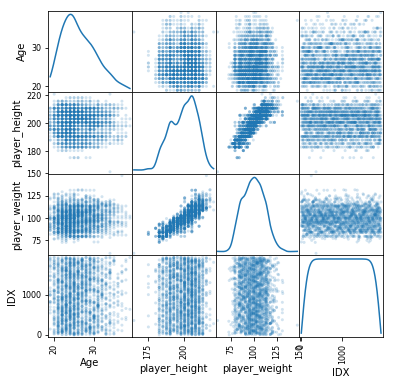

In [54]:
# check projections to see if it looks okay
from pandas.plotting import scatter_matrix
scatter_matrix(physicalDF, alpha = 0.2, figsize = (6,6), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BAC7A58D0>,
      dtype=object)

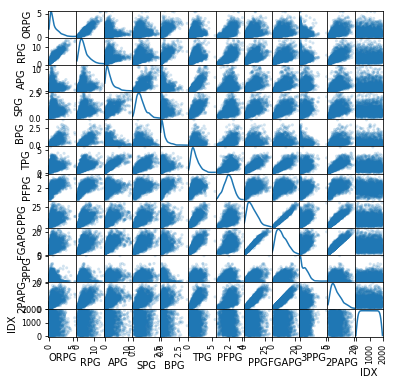

In [55]:
# check reg perf
scatter_matrix(regPerfDF, alpha = 0.2, figsize =(6,6), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B9E937470>,
      dtype=object)

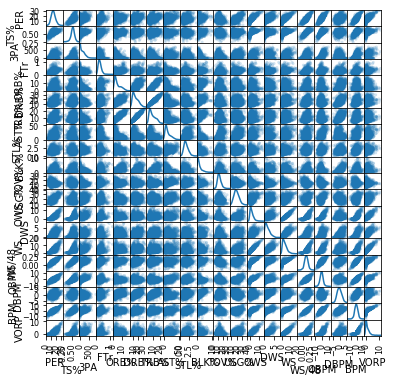

In [15]:
# adv perf
scatter_matrix(advPerfDF, alpha = 0.2, figsize = (6,6), diagonal = 'kde')

In [56]:
physicalDF['Cluster Label'] = kmPhys.labels_
regPerfDF['Cluster Label'] = kmReg.labels_
advPerfDF['Cluster Label'] = kmAdv.labels_

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [57]:
physicalDF.head()

,Age,player_height,player_weight,IDX,Cluster Label
0,25.0,182.88,73.028312,0,0
1,25.0,190.50,91.625584,1,0
2,29.0,205.74,113.398000,2,1
3,23.0,208.28,111.130040,3,1
4,25.0,208.28,127.005760,4,1


In [58]:
# Add cluster values to DF
physicalDF = physicalDF.rename({'Cluster Label' : 'Physical Cluster'}, axis = 'columns')
regPerfDF = regPerfDF.rename({'Cluster Label' : 'Reg Performance Cluster'}, axis = 'columns')
advPerfDF = advPerfDF.rename({'Cluster Label' : 'Adv Performance Cluster'}, axis = 'columns')

In [59]:
DF = DF.merge(physicalDF[['IDX', 'Physical Cluster']], on = 'IDX', how = 'left')
DF = DF.merge(regPerfDF[['IDX', 'Reg Performance Cluster']], on = 'IDX', how = 'left')
DF = DF.merge(advPerfDF[['IDX', 'Adv Performance Cluster']], on = 'IDX', how = 'left')
DF.head()

,Year,Name,Age,PER,GS,GP,TS%,FTr,OWS,DWS,...,Injury_DNP,Injury_Out_Indef,Injury_Out_Season,Injury_Returned,Injury_Other,Salary%,IDX,Physical Cluster,Reg Performance Cluster,Adv Performance Cluster
0,2010,Aaron Brooks,25.0,16.00,82.0,82.0,0.549,0.2240,3.900,1.600,...,0.0,0.0,0.0,0.0,0.0,3.495133,0,0,3,3
1,2010,Acie Law,25.0,15.05,0.5,13.0,0.584,0.6905,0.175,0.075,...,0.0,0.0,0.0,0.0,0.0,1.097492,1,0,1,2
2,2010,Al Harrington,29.0,16.80,15.0,72.0,0.546,0.3080,2.200,1.300,...,0.0,0.0,0.0,0.0,0.0,9.991334,2,1,0,3
3,2010,Al Horford,23.0,19.40,81.0,81.0,0.594,0.3190,6.900,3.900,...,0.0,0.0,0.0,0.0,0.0,9.436494,3,1,0,2
4,2010,Al Jefferson,25.0,19.00,76.0,76.0,0.524,0.2360,2.300,2.300,...,0.0,0.0,0.0,0.0,0.0,22.530329,4,1,3,2


In [60]:
DF = DF.drop('IDX', axis = 1)
DF.head()

,Year,Name,Age,PER,GS,GP,TS%,FTr,OWS,DWS,...,Injury_DTD,Injury_DNP,Injury_Out_Indef,Injury_Out_Season,Injury_Returned,Injury_Other,Salary%,Physical Cluster,Reg Performance Cluster,Adv Performance Cluster
0,2010,Aaron Brooks,25.0,16.00,82.0,82.0,0.549,0.2240,3.900,1.600,...,0.0,0.0,0.0,0.0,0.0,0.0,3.495133,0,3,3
1,2010,Acie Law,25.0,15.05,0.5,13.0,0.584,0.6905,0.175,0.075,...,0.0,0.0,0.0,0.0,0.0,0.0,1.097492,0,1,2
2,2010,Al Harrington,29.0,16.80,15.0,72.0,0.546,0.3080,2.200,1.300,...,0.0,0.0,0.0,0.0,0.0,0.0,9.991334,1,0,3
3,2010,Al Horford,23.0,19.40,81.0,81.0,0.594,0.3190,6.900,3.900,...,0.0,0.0,0.0,0.0,0.0,0.0,9.436494,1,0,2
4,2010,Al Jefferson,25.0,19.00,76.0,76.0,0.524,0.2360,2.300,2.300,...,0.0,0.0,0.0,0.0,0.0,0.0,22.530329,1,3,2


In [61]:
AnalysisDF = DF[['Year', 'Name', 'Salary%', 'Physical Cluster', 'Reg Performance Cluster', 'Adv Performance Cluster']]
AnalysisDF.head()

,Year,Name,Salary%,Physical Cluster,Reg Performance Cluster,Adv Performance Cluster
0,2010,Aaron Brooks,3.495133,0,3,3
1,2010,Acie Law,1.097492,0,1,2
2,2010,Al Harrington,9.991334,1,0,3
3,2010,Al Horford,9.436494,1,0,2
4,2010,Al Jefferson,22.530329,1,3,2


In [62]:
AnalysisDF['Adv Performance Cluster'].value_counts()

2    832
0    490
1    412
3    203
Name: Adv Performance Cluster, dtype: int64

In [63]:
AnalysisDF['Reg Performance Cluster'].value_counts()

1    667
2    613
0    441
3    216
Name: Reg Performance Cluster, dtype: int64

In [64]:
AnalysisDF['Physical Cluster'].value_counts()

1    1009
0     928
Name: Physical Cluster, dtype: int64

In [65]:
AnalysisDF.to_csv('clusters_and_salary.csv')